<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/Imbalanced/1_2_Under_Sampling%2BTomek%2BLink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import files
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
#read from csv file 
df = pd.read_csv('LiverDisorder.csv')

# 345 examples; 6 features ; binary class
# show all data, examples and labels
df.head()

,v1,v2,v3,v4,v5,v6,class
0,85,92,45,27,31,0.0,1
1,85,64,59,32,23,0.0,0
2,86,54,33,16,54,0.0,0
3,91,78,34,24,36,0.0,0
4,87,70,12,28,10,0.0,0


In [0]:
X = df.values[:, 0:6]
y = df.values[:, 6]

In [0]:
len(df)

345

In [5]:
print(sorted(Counter(y).items()))

[(0.0, 200), (1.0, 145)]


In [6]:
X

array([[85., 92., 45., 27., 31.,  0.],
       [85., 64., 59., 32., 23.,  0.],
       [86., 54., 33., 16., 54.,  0.],
       ...,
       [98., 77., 55., 35., 89., 15.],
       [91., 68., 27., 26., 14., 16.],
       [98., 99., 57., 45., 65., 20.]])

In [7]:
y

array([1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

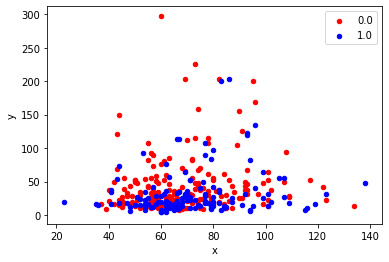

In [8]:
#visualize the data before any work is done
dt = DataFrame(dict(x=X[:,1], y=X[:,4], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [0]:
# Tomek Link
from imblearn.under_sampling import TomekLinks
tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)

In [10]:
# number of examples after applying the algorithm
# from 345 to 314 so 31 from majority group
len(X_res)

314

In [11]:
# of examples for each class
# majority decreased from 259 to 250
print(sorted(Counter(y_res).items()))

[(0.0, 169), (1.0, 145)]


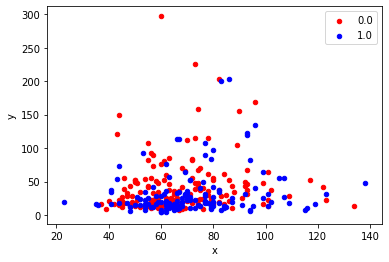

In [12]:
#visualize the data after algorithm is complete
dt = DataFrame(dict(x=X_res[:,1], y=X_res[:,4], label=y_res))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = dt.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()